In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import os

In [7]:
ls

 Volume in drive E has no label.
 Volume Serial Number is 4EE6-B5D7

 Directory of e:\projects\mlproject\logs\notebook\data

10.10.2024  21:47    <DIR>          .
10.10.2024  21:47    <DIR>          ..
10.10.2024  21:58             9.724 EDA.ipynb
10.10.2024  21:45                 0 MODEL_TRAINING.ipynb
11.10.2019  12:48            72.036 StudentsPerformance.csv
               3 File(s)         81.760 bytes
               2 Dir(s)  63.564.476.416 bytes free


In [8]:
df=pd.read_csv("StudentsPerformance.csv")

In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df["gender"].unique()
df["race/ethnicity"].unique()
df["parental level of education"].unique()
df["lunch"].unique()
df["test preparation course"].unique()

array(['female', 'male'], dtype=object)

In [14]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [15]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [17]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

kategorik ve numerik kısımları ayırma yolu : 

In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features =[feature for feature in df.columns if df[feature].dtype =='O']

In [24]:
numeric_features

['math score', 'reading score', 'writing score']

In [25]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [26]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [27]:
df["total score"] = df["math score"] +df["reading score"]+df["writing score"]
df["average"]=df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [31]:
reading_full=df[df["reading score"] == 100]["average"].count()
writing_full=df[df["writing score"] == 100]["average"].count()
math_full=df[df["math score"] == 100]["average"].count()

print(math_full)
print(writing_full)
print(reading_full)

7
14
17


In [33]:
reading_full=df[df["reading score"] <= 30]["average"].count()
writing_full=df[df["writing score"] <= 30]["average"].count()
math_full=df[df["math score"] <= 30]["average"].count()

print(math_full)
print(writing_full)
print(reading_full)

16
10
8


In [36]:
import seaborn as sns 

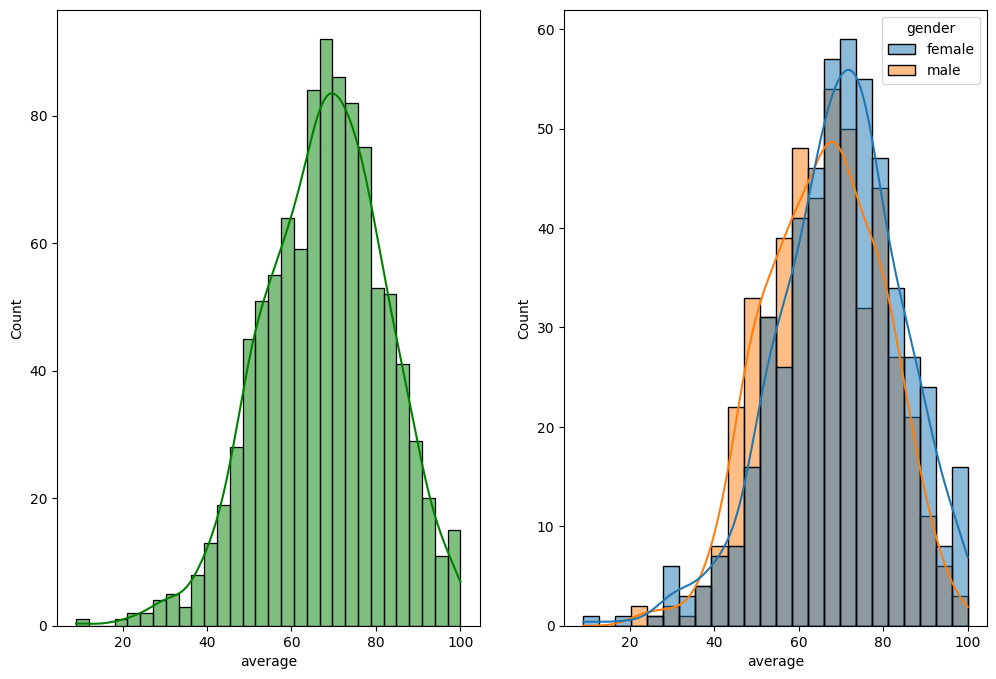

In [42]:
fig ,axs =plt.subplots(1,2,figsize=(12,8))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show()

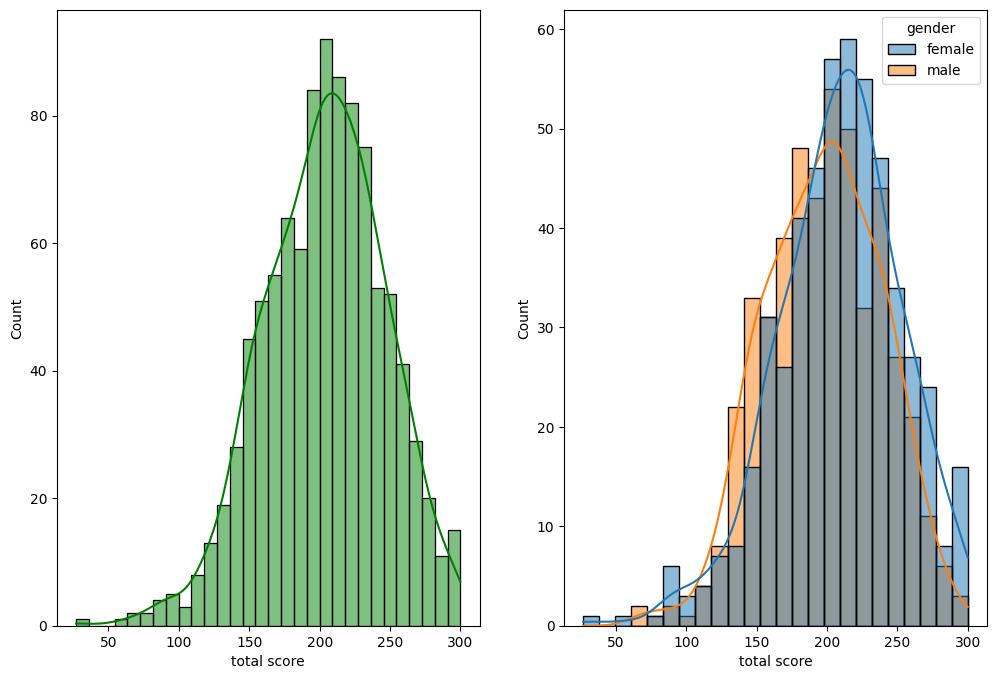

In [43]:
fig ,axs =plt.subplots(1,2,figsize=(12,8))
plt.subplot(121)
sns.histplot(data=df,x="total score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="total score",kde=True,hue="gender")
plt.show()